In [4]:
# BEST MODEL

# Feature Engineering: Stopwords and Oversampling and Stemming
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from nltk.corpus import stopwords
import string

from nltk.stem import WordNetLemmatizer, PorterStemmer

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('omw-1.4')
# nltk.download("averaged_perceptron_tagger")
# nltk.download("maxent_ne_chunker")
# nltk.download("words")

STOPWORDS = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = list(filter(lambda token: token not in STOPWORDS, tokens))
    
    ps = PorterStemmer()
    tokens = [ps.stem(token) for token in tokens]
    
    return ' '.join(tokens)

def features(X_train):
    stop_words_features = []
    for text in X_train:
        words = word_tokenize(text.lower())
        n = len(words)
        if n == 0:
            stop_words_features.append(0)
            continue
        num_stop_words = 0
        num_exclamation_marks = 0
        for word in words:
            if word in STOPWORDS:
                num_stop_words += 1

        stop_words_features.append(num_stop_words/n * 100)
    
    stop_words_features = np.array(stop_words_features).reshape(-1, 1)
    
    result = np.hstack((
        stop_words_features,
        ))
    return result

start = time.time()

resampler = RandomOverSampler(random_state=42)
model = ImbPipeline(steps=[
        ("features", FeatureUnion([
            ("tfidf", TfidfVectorizer(preprocessor=preprocess_text)),
            ("otherfeatures", FunctionTransformer(features, validate=False)),
        ], n_jobs=-1)),
        ("resampler", resampler),
        ("classifier", LogisticRegression(C=0.9, max_iter=10000))
    ])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score_macro = f1_score(y_test, y_pred, average='macro')
f1score_micro = f1_score(y_test, y_pred, average='micro')
print("F1 Macro Score: ", f1score_macro)
print("F1 Micro Score: ", f1score_micro)
print(confusion_matrix(y_test, y_pred))
print('Time taken: {}'.format(time.time() - start))

F1 Macro Score:  0.7639833906417784
F1 Micro Score:  0.767
[[567  92  41  50]
 [ 37 447 229  37]
 [ 33  19 603  95]
 [ 37   6  23 684]]
Time taken: 705.8404417037964


In [12]:
# NO CROSS VALIDATION

# Feature Engineering: Stopwords and Oversampling and Stemming
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from nltk.corpus import stopwords
import string

from nltk.stem import WordNetLemmatizer, PorterStemmer

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('omw-1.4')
# nltk.download("averaged_perceptron_tagger")
# nltk.download("maxent_ne_chunker")
# nltk.download("words")

STOPWORDS = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = list(filter(lambda token: token not in STOPWORDS, tokens))
    
    ps = PorterStemmer()
    tokens = [ps.stem(token) for token in tokens]
    
    return ' '.join(tokens)

def features(X_train):
    stop_words_features = []
    for text in X_train:
        words = word_tokenize(text.lower())
        n = len(words)
        if n == 0:
            stop_words_features.append(0)
            continue
        num_stop_words = 0
        num_exclamation_marks = 0
        for word in words:
            if word in STOPWORDS:
                num_stop_words += 1

        stop_words_features.append(num_stop_words/n * 100)
    
    stop_words_features = np.array(stop_words_features).reshape(-1, 1)
    
    result = np.hstack((
        stop_words_features,
        ))
    return result

start = time.time()

resampler = RandomOverSampler(random_state=42)
model = ImbPipeline(steps=[
#         ("features", FeatureUnion([
#             ("tfidf", TfidfVectorizer(preprocessor=preprocess_text)),
#             ("otherfeatures", FunctionTransformer(features, validate=False)),
#         ])),
        ("tfidf", TfidfVectorizer()),
        ("resampler", resampler),
        ("classifier", LogisticRegression(max_iter=10000))
    ])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score_macro = f1_score(y_test, y_pred, average='macro')
f1score_micro = f1_score(y_test, y_pred, average='micro')
print("F1 Macro Score: ", f1score_macro)
print("F1 Micro Score: ", f1score_micro)
print(confusion_matrix(y_test, y_pred))
print('Time taken: {}'.format(time.time() - start))

F1 Macro Score:  0.7428708029943922
F1 Micro Score:  0.75
[[593  67  41  49]
 [ 40 359 312  39]
 [ 34   9 599 108]
 [ 22   5  24 699]]
Time taken: 92.65294551849365


[[567  92  41  50]
 [ 37 447 229  37]
 [ 33  19 603  95]
 [ 37   6  23 684]]


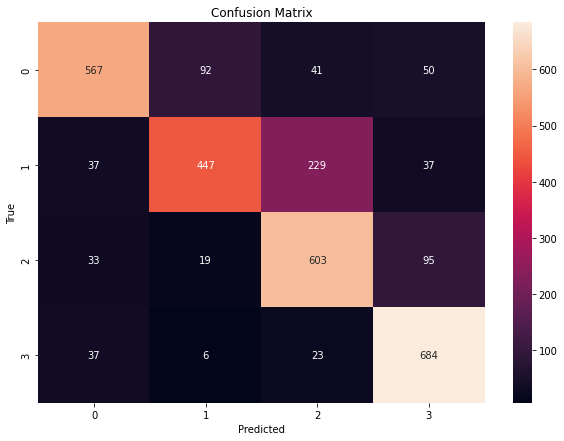

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [1]:
import numpy as np
import pandas as pd
import time

import nltk
from nltk import word_tokenize

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import MaxAbsScaler

# Oversampling
# Undersampling

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return ' '.join(tokens)

def main():
    train = pd.read_csv('./raw_data/fulltrain.csv',  header=None)
    y_train = train.iloc[:, 0]
    X_train = train.iloc[:, 1]
    test = pd.read_csv('./raw_data/balancedtest.csv', header=None)
    y_test = test.iloc[:, 0]
    X_test = test.iloc[:, 1]
    
    start = time.time()
    
    model = Pipeline(steps=[
        ("tfidf", TfidfVectorizer(preprocessor=preprocess_text)),
        ("scaler", MaxAbsScaler()),
        ("classifier", LogisticRegression(max_iter=1000))
    ])
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    f1score_macro = f1_score(y_test, y_pred, average='macro')
    f1score_micro = f1_score(y_test, y_pred, average='micro')
    print("F1 Macro Score: ", f1score_macro)
    print("F1 Micro Score: ", f1score_micro)
    print(confusion_matrix(y_test, y_pred))
    print('Time taken: {}'.format(time.time() - start))
    
# if __name__ == "__main__":
#     main()

In [7]:
main()

F1 Macro Score:  0.7048288887802756
F1 Micro Score:  0.7195731910636879
[[592  41  59  57]
 [ 36 260 409  45]
 [ 32  10 613  95]
 [ 22   3  32 693]]
Time taken: 202.69247174263


In [2]:
import numpy as np
import pandas as pd
import time

import nltk
from nltk import word_tokenize

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import MaxAbsScaler

In [3]:
# Read Training and Test values
train = pd.read_csv('./raw_data/fulltrain.csv', header=None)
y_train = train.iloc[:, 0]
X_train = train.iloc[:, 1]
test = pd.read_csv('./raw_data/balancedtest.csv', header=None)
y_test = test.iloc[:, 0]
X_test = test.iloc[:, 1]

# Class Imbalance
print(y_train.value_counts())

3    17870
1    14047
4     9995
2     6942
Name: 0, dtype: int64


In [7]:
# Base: TF-IDF, MaxAbsScaler, LR
start = time.time()

model = Pipeline(steps=[
    ("tfidf", TfidfVectorizer(preprocessor=preprocess_text)),
    ("scaler", MaxAbsScaler()),
    ("classifier", LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score_macro = f1_score(y_test, y_pred, average='macro')
f1score_micro = f1_score(y_test, y_pred, average='micro')
print("F1 Macro Score: ", f1score_macro)
print("F1 Micro Score: ", f1score_micro)
print(confusion_matrix(y_test, y_pred))
print('Time taken: {}'.format(time.time() - start))

F1 Macro Score:  0.7048891143800079
F1 Micro Score:  0.7196666666666667
[[593  41  59  57]
 [ 36 260 409  45]
 [ 32  10 613  95]
 [ 22   3  32 693]]
Time taken: 209.89469838142395


In [17]:
# RandomOverSampler

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

start = time.time()

resampler = RandomOverSampler(random_state=42)
model = ImbPipeline(steps=[
        ("tfidf", TfidfVectorizer(preprocessor=preprocess_text)),
        ("resampler", resampler),
        ("scaler", MaxAbsScaler()),
        ("classifier", LogisticRegression(max_iter=1000))
    ])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score_macro = f1_score(y_test, y_pred, average='macro')
f1score_micro = f1_score(y_test, y_pred, average='micro')
print("F1 Macro Score: ", f1score_macro)
print("F1 Micro Score: ", f1score_micro)
print(confusion_matrix(y_test, y_pred))
print('Time taken: {}'.format(time.time() - start))

In [21]:
# SMOTE

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

start = time.time()

smote = SMOTE(random_state=42)
model = ImbPipeline(steps=[
        ("tfidf", TfidfVectorizer(preprocessor=preprocess_text)),
        ("smote", smote),
        ("scaler", MaxAbsScaler()),
        ("classifier", LogisticRegression(max_iter=1000))
    ])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score_macro = f1_score(y_test, y_pred, average='macro')
f1score_micro = f1_score(y_test, y_pred, average='micro')
print("F1 Macro Score: ", f1score_macro)
print("F1 Micro Score: ", f1score_micro)
print(confusion_matrix(y_test, y_pred))
print('Time taken: {}'.format(time.time() - start))

F1 Macro Score:  0.7165847774946114
F1 Micro Score:  0.72757585861954
[[583  51  56  59]
 [ 35 299 369  47]
 [ 31  10 600 109]
 [ 20   3  27 700]]


NameError: name 'start' is not defined

In [22]:
# RandomUnderSampler

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

start = time.time()

resampler = RandomUnderSampler()
model = ImbPipeline(steps=[
        ("tfidf", TfidfVectorizer(preprocessor=preprocess_text)),
        ("resampler", resampler),
        ("scaler", MaxAbsScaler()),
        ("classifier", LogisticRegression(max_iter=1000))
    ])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score_macro = f1_score(y_test, y_pred, average='macro')
f1score_micro = f1_score(y_test, y_pred, average='micro')
print("F1 Macro Score: ", f1score_macro)
print("F1 Micro Score: ", f1score_micro)
print(confusion_matrix(y_test, y_pred))
print('Time taken: {}'.format(time.time() - start))

F1 Macro Score:  0.7281367881901537
F1 Micro Score:  0.7349116372124042
[[555  65  47  82]
 [ 32 356 310  52]
 [ 26  11 592 121]
 [ 17   5  27 701]]
Time taken: 182.00884199142456


In [31]:
# Feature Engineering: Stopwords

from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from nltk.corpus import stopwords
import string

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('omw-1.4')
# nltk.download("averaged_perceptron_tagger")
# nltk.download("maxent_ne_chunker")
# nltk.download("words")

STOPWORDS = set(stopwords.words("english"))

def features(X_train):
    stop_words_features = []
    for text in X_train:
        words = word_tokenize(text.lower())
        n = len(words)
        if n == 0:
            stop_words_features.append(0)
            continue
        num_stop_words = 0
        for word in words:
            if word in STOPWORDS:
                num_stop_words += 1

        stop_words_features.append(num_stop_words/n * 100)
    
    stop_words_features = np.array(stop_words_features).reshape(-1, 1)
    
    result = np.hstack((
        stop_words_features,
        ))
    return result

start = time.time()

model = ImbPipeline(steps=[
        ("features", FeatureUnion([
            ("tfidf", TfidfVectorizer(preprocessor=preprocess_text)),
            ("otherfeatures", FunctionTransformer(features, validate=False)),
        ], n_jobs=-1)),
        ("scaler", MaxAbsScaler()),
        ("classifier", LogisticRegression(max_iter=1000))
    ])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score_macro = f1_score(y_test, y_pred, average='macro')
f1score_micro = f1_score(y_test, y_pred, average='micro')
print("F1 Macro Score: ", f1score_macro)
print("F1 Micro Score: ", f1score_micro)
print(confusion_matrix(y_test, y_pred))
print('Time taken: {}'.format(time.time() - start))

F1 Macro Score:  0.7118336109231469
F1 Micro Score:  0.7259086362120707
[[605  42  53  49]
 [ 38 268 402  42]
 [ 32  10 612  96]
 [ 22   5  31 692]]
Time taken: 220.72338271141052


In [30]:
# Feature Engineering: Punctuations

from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from nltk.corpus import stopwords
import string

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('omw-1.4')
# nltk.download("averaged_perceptron_tagger")
# nltk.download("maxent_ne_chunker")
# nltk.download("words")

STOPWORDS = set(stopwords.words("english"))
PUNCTUATIONS = set(string.punctuation)
NEGATIVE_WORDS = set(["n't", "not", "no"])

def features(X_train):
    stop_words_features = []
    punctuations_features = []
    negative_words_features = []
    for text in X_train:
        words = word_tokenize(text.lower())
        n = len(words)
        if n == 0:
            stop_words_features.append(0)
            continue
        num_stop_words = 0
        num_punctuations = 0
        for char in text:
            if char in STOPWORDS:
                num_stop_words += 1
            if char in PUNCTUATIONS:
                num_punctuations += 1
        
        num_negative_words = 0
        for word in words:
            if word in NEGATIVE_WORDS:
                num_negative_words += 1

        stop_words_features.append(num_stop_words/n * 100)
        punctuations_features.append(num_punctuations/n * 100)
        negative_words_features.append(num_negative_words/n * 100)
    
    stop_words_features = np.array(stop_words_features).reshape(-1, 1)
    punctuations_features = np.array(punctuations_features).reshape(-1, 1)
    negative_words_features = np.array(negative_words_features).reshape(-1, 1)
    
    result = np.hstack((
#         stop_words_features, 
        punctuations_features, 
#         negative_words_features,
        ))
    return result

start = time.time()

model = ImbPipeline(steps=[
        ("features", FeatureUnion([
            ("tfidf", TfidfVectorizer(preprocessor=preprocess_text)),
            ("otherfeatures", FunctionTransformer(features, validate=False)),
        ], n_jobs=-1)),
        ("scaler", MaxAbsScaler()),
        ("classifier", LogisticRegression(max_iter=1000))
    ])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score_macro = f1_score(y_test, y_pred, average='macro')
f1score_micro = f1_score(y_test, y_pred, average='micro')
print("F1 Macro Score: ", f1score_macro)
print("F1 Micro Score: ", f1score_micro)
print(confusion_matrix(y_test, y_pred))
print('Time taken: {}'.format(time.time() - start))

F1 Macro Score:  0.7090237293356257
F1 Micro Score:  0.7239079693231076
[[595  44  55  55]
 [ 37 262 408  43]
 [ 31  10 619  90]
 [ 22   3  30 695]]
Time taken: 226.51388120651245


In [33]:
# Feature Engineering: Stopwords and Oversampling

from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from nltk.corpus import stopwords
import string

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('omw-1.4')
# nltk.download("averaged_perceptron_tagger")
# nltk.download("maxent_ne_chunker")
# nltk.download("words")

STOPWORDS = set(stopwords.words("english"))

def features(X_train):
    stop_words_features = []
    for text in X_train:
        words = word_tokenize(text.lower())
        n = len(words)
        if n == 0:
            stop_words_features.append(0)
            continue
        num_stop_words = 0
        for word in words:
            if word in STOPWORDS:
                num_stop_words += 1

        stop_words_features.append(num_stop_words/n * 100)
    
    stop_words_features = np.array(stop_words_features).reshape(-1, 1)
    
    result = np.hstack((
        stop_words_features,
        ))
    return result

start = time.time()

resampler = RandomOverSampler(random_state=42)
model = ImbPipeline(steps=[
        ("features", FeatureUnion([
            ("tfidf", TfidfVectorizer(preprocessor=preprocess_text)),
            ("otherfeatures", FunctionTransformer(features, validate=False)),
        ], n_jobs=-1)),
        ("resampler", resampler),
        ("scaler", MaxAbsScaler()),
        ("classifier", LogisticRegression(max_iter=1000))
    ])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score_macro = f1_score(y_test, y_pred, average='macro')
f1score_micro = f1_score(y_test, y_pred, average='micro')
print("F1 Macro Score: ", f1score_macro)
print("F1 Micro Score: ", f1score_micro)
print(confusion_matrix(y_test, y_pred))
print('Time taken: {}'.format(time.time() - start))

F1 Macro Score:  0.7219595634326925
F1 Micro Score:  0.732
[[588  55  51  56]
 [ 33 311 361  45]
 [ 32  10 596 112]
 [ 20   5  24 701]]
Time taken: 211.09539985656738


In [34]:
# Feature Engineering: Stopwords and Oversampling and Punctuations

from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from nltk.corpus import stopwords
import string

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('omw-1.4')
# nltk.download("averaged_perceptron_tagger")
# nltk.download("maxent_ne_chunker")
# nltk.download("words")

STOPWORDS = set(stopwords.words("english"))
PUNCTUATIONS = set(string.punctuation)

def features(X_train):
    stop_words_features = []
    punctuations_features = []
    
    for text in X_train:
        words = word_tokenize(text.lower())
        n = len(words)
        if n == 0:
            stop_words_features.append(0)
            continue
        num_stop_words = 0
        for word in words:
            if word in STOPWORDS:
                num_stop_words += 1
        num_punctuations = 0
        for char in text:
            if char in STOPWORDS:
                num_stop_words += 1
            if char in PUNCTUATIONS:
                num_punctuations += 1
                
        stop_words_features.append(num_stop_words/n * 100)
        punctuations_features.append(num_punctuations/n * 100)
    
    stop_words_features = np.array(stop_words_features).reshape(-1, 1)
    punctuations_features = np.array(punctuations_features).reshape(-1, 1)
    
    result = np.hstack((
        stop_words_features,
        punctuations_features
        ))
    return result

start = time.time()

resampler = RandomOverSampler(random_state=42)
model = ImbPipeline(steps=[
        ("features", FeatureUnion([
            ("tfidf", TfidfVectorizer(preprocessor=preprocess_text)),
            ("otherfeatures", FunctionTransformer(features, validate=False)),
        ], n_jobs=-1)),
        ("resampler", resampler),
        ("scaler", MaxAbsScaler()),
        ("classifier", LogisticRegression(max_iter=1000))
    ])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score_macro = f1_score(y_test, y_pred, average='macro')
f1score_micro = f1_score(y_test, y_pred, average='micro')
print("F1 Macro Score: ", f1score_macro)
print("F1 Micro Score: ", f1score_micro)
print(confusion_matrix(y_test, y_pred))
print('Time taken: {}'.format(time.time() - start))

F1 Macro Score:  0.7211237548348766
F1 Micro Score:  0.7313333333333333
[[578  56  50  66]
 [ 33 313 357  47]
 [ 31  11 600 108]
 [ 22   3  22 703]]
Time taken: 206.73965406417847


In [44]:
train = pd.read_csv('./raw_data/train.csv')
y_train = train.iloc[:, 0]
X_train = train.iloc[:, 1]
val = pd.read_csv('./raw_data/val.csv')
y_val = val.iloc[:, 0]
X_val = val.iloc[:, 1]
test = pd.read_csv('./raw_data/balancedtest.csv', header=None)
y_test = test.iloc[:, 0]
X_test = test.iloc[:, 1]

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import f1_score, confusion_matrix, make_scorer

def features(X_train):
    stop_words_features = []
    for text in X_train:
        words = word_tokenize(text.lower())
        n = len(words)
        if n == 0:
            stop_words_features.append(0)
            continue
        num_stop_words = 0
        for word in words:
            if word in STOPWORDS:
                num_stop_words += 1

        stop_words_features.append(num_stop_words/n * 100)
    
    stop_words_features = np.array(stop_words_features).reshape(-1, 1)
    
    result = np.hstack((
        stop_words_features,
        ))
    return result

parameters = {
    'classifier__C': [0.01, 0.1, 1, 10, 100]
}

resampler = RandomOverSampler(random_state=42)
model = ImbPipeline(steps=[
        ("features", FeatureUnion([
            ("tfidf", TfidfVectorizer(preprocessor=preprocess_text)),
            ("otherfeatures", FunctionTransformer(features, validate=False)),
        ], n_jobs=-1)),
        ("resampler", resampler),
        ("scaler", MaxAbsScaler()),
        ("classifier", LogisticRegression(max_iter=1000))
    ])


scorer = make_scorer(f1_score, average='macro')

grid_search = GridSearchCV(model, parameters, cv=KFold(5), scoring=scorer, verbose=1)
grid_search.fit(X_train, y_train)
print("Best parameters set found on development set:")
print(grid_search.best_params_)
print()

y_val_pred = grid_search.predict(X_val)
print("Validation F1 Macro Score: ", f1_score(y_val, y_val_pred, average='macro'))
print("Validation F1 Micro Score: ", f1_score(y_val, y_val_pred, average='micro'))

y_test_pred = grid_search.predict(X_test)
print("Test F1 Macro Score: ", f1_score(y_test, y_test_pred, average='macro'))
print("Test F1 Micro Score: ", f1_score(y_test, y_test_pred, average='micro'))

print(confusion_matrix(y_test, y_test_pred))
print('Time taken: {}'.format(time.time() - start))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [11]:
# NO CROSS VALIDATION

# Feature Engineering: Stopwords and Oversampling and Lemmatization
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from nltk.corpus import stopwords
import string

from nltk.stem import WordNetLemmatizer

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('omw-1.4')
# nltk.download("averaged_perceptron_tagger")
# nltk.download("maxent_ne_chunker")
# nltk.download("words")

STOPWORDS = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)

def features(X_train):
    stop_words_features = []
    for text in X_train:
        words = word_tokenize(text.lower())
        n = len(words)
        if n == 0:
            stop_words_features.append(0)
            continue
        num_stop_words = 0
        num_exclamation_marks = 0
        for word in words:
            if word in STOPWORDS:
                num_stop_words += 1

        stop_words_features.append(num_stop_words/n * 100)
    
    stop_words_features = np.array(stop_words_features).reshape(-1, 1)
    
    result = np.hstack((
        stop_words_features,
        ))
    return result

start = time.time()

resampler = RandomOverSampler(random_state=42)
model = ImbPipeline(steps=[
        ("features", FeatureUnion([
            ("tfidf", TfidfVectorizer(preprocessor=preprocess_text)),
            ("otherfeatures", FunctionTransformer(features, validate=False)),
        ], n_jobs=-1)),
        ("resampler", resampler),
        ("scaler", MaxAbsScaler()),
        ("classifier", LogisticRegression(max_iter=1000))
    ])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score_macro = f1_score(y_test, y_pred, average='macro')
f1score_micro = f1_score(y_test, y_pred, average='micro')
print("F1 Macro Score: ", f1score_macro)
print("F1 Micro Score: ", f1score_micro)
print(confusion_matrix(y_test, y_pred))
print('Time taken: {}'.format(time.time() - start))

F1 Macro Score:  0.7299696021831981
F1 Micro Score:  0.739
[[589  53  51  57]
 [ 28 321 354  47]
 [ 30  11 607 102]
 [ 17   5  28 700]]
Time taken: 319.47268891334534


In [12]:
# NO CROSS VALIDATION

# Feature Engineering: Stopwords and Oversampling and Stemming and Lemmatization
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from nltk.corpus import stopwords
import string

from nltk.stem import WordNetLemmatizer, PorterStemmer

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('omw-1.4')
# nltk.download("averaged_perceptron_tagger")
# nltk.download("maxent_ne_chunker")
# nltk.download("words")

STOPWORDS = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    ps = PorterStemmer()
    tokens = [ps.stem(token) for token in tokens]
    
    return ' '.join(tokens)

def features(X_train):
    stop_words_features = []
    for text in X_train:
        words = word_tokenize(text.lower())
        n = len(words)
        if n == 0:
            stop_words_features.append(0)
            continue
        num_stop_words = 0
        num_exclamation_marks = 0
        for word in words:
            if word in STOPWORDS:
                num_stop_words += 1

        stop_words_features.append(num_stop_words/n * 100)
    
    stop_words_features = np.array(stop_words_features).reshape(-1, 1)
    
    result = np.hstack((
        stop_words_features,
        ))
    return result

start = time.time()

resampler = RandomOverSampler(random_state=42)
model = ImbPipeline(steps=[
        ("features", FeatureUnion([
            ("tfidf", TfidfVectorizer(preprocessor=preprocess_text)),
            ("otherfeatures", FunctionTransformer(features, validate=False)),
        ], n_jobs=-1)),
        ("resampler", resampler),
        ("scaler", MaxAbsScaler()),
        ("classifier", LogisticRegression(max_iter=1000))
    ])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score_macro = f1_score(y_test, y_pred, average='macro')
f1score_micro = f1_score(y_test, y_pred, average='micro')
print("F1 Macro Score: ", f1score_macro)
print("F1 Micro Score: ", f1score_micro)
print(confusion_matrix(y_test, y_pred))
print('Time taken: {}'.format(time.time() - start))

F1 Macro Score:  0.7311154536427189
F1 Micro Score:  0.74
[[588  59  44  59]
 [ 33 330 339  48]
 [ 31  11 607 101]
 [ 25   3  27 695]]
Time taken: 650.992427110672


In [10]:
# NO CROSS VALIDATION

# Feature Engineering: Stopwords and Oversampling and Stemming
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from nltk.corpus import stopwords
import string

from nltk.stem import WordNetLemmatizer, PorterStemmer

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('omw-1.4')
# nltk.download("averaged_perceptron_tagger")
# nltk.download("maxent_ne_chunker")
# nltk.download("words")

STOPWORDS = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    
    ps = PorterStemmer()
    tokens = [ps.stem(token) for token in tokens]
    
    return ' '.join(tokens)

def features(X_train):
    stop_words_features = []
    for text in X_train:
        words = word_tokenize(text.lower())
        n = len(words)
        if n == 0:
            stop_words_features.append(0)
            continue
        num_stop_words = 0
        num_exclamation_marks = 0
        for word in words:
            if word in STOPWORDS:
                num_stop_words += 1

        stop_words_features.append(num_stop_words/n * 100)
    
    stop_words_features = np.array(stop_words_features).reshape(-1, 1)
    
    result = np.hstack((
        stop_words_features,
        ))
    return result

start = time.time()

resampler = RandomOverSampler(random_state=42)
model = ImbPipeline(steps=[
        ("features", FeatureUnion([
            ("tfidf", TfidfVectorizer(preprocessor=preprocess_text)),
            ("otherfeatures", FunctionTransformer(features, validate=False)),
        ], n_jobs=-1)),
        ("resampler", resampler),
        ("classifier", LogisticRegression(C=0.9, max_iter=10000))
    ])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score_macro = f1_score(y_test, y_pred, average='macro')
f1score_micro = f1_score(y_test, y_pred, average='micro')
print("F1 Macro Score: ", f1score_macro)
print("F1 Micro Score: ", f1score_micro)
print(confusion_matrix(y_test, y_pred))
print('Time taken: {}'.format(time.time() - start))

F1 Macro Score:  0.7579663304080297
F1 Micro Score:  0.7633333333333333
[[599  71  36  44]
 [ 37 392 273  48]
 [ 33  13 610  94]
 [ 27   5  29 689]]
Time taken: 821.6594815254211


In [3]:
# NO CROSS VALIDATION

# Feature Engineering: Stopwords and Oversampling and Stemming and Stopwords Removal
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from nltk.corpus import stopwords
import string

from nltk.stem import WordNetLemmatizer, PorterStemmer

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('omw-1.4')
# nltk.download("averaged_perceptron_tagger")
# nltk.download("maxent_ne_chunker")
# nltk.download("words")

STOPWORDS = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = list(filter(lambda token: token not in STOPWORDS, tokens))
    
    ps = PorterStemmer()
    tokens = [ps.stem(token) for token in tokens]
    
    return ' '.join(tokens)

def features(X_train):
    stop_words_features = []
    for text in X_train:
        words = word_tokenize(text.lower())
        n = len(words)
        if n == 0:
            stop_words_features.append(0)
            continue
        num_stop_words = 0
        num_exclamation_marks = 0
        for word in words:
            if word in STOPWORDS:
                num_stop_words += 1

        stop_words_features.append(num_stop_words/n * 100)
    
    stop_words_features = np.array(stop_words_features).reshape(-1, 1)
    
    result = np.hstack((
        stop_words_features,
        ))
    return result

start = time.time()

resampler = RandomOverSampler(random_state=42)
model = ImbPipeline(steps=[
        ("features", FeatureUnion([
            ("tfidf", TfidfVectorizer(preprocessor=preprocess_text)),
            ("otherfeatures", FunctionTransformer(features, validate=False)),
        ], n_jobs=-1)),
        ("resampler", resampler),
        ("scaler", MaxAbsScaler()),
        ("classifier", LogisticRegression(max_iter=10000))
    ])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score_macro = f1_score(y_test, y_pred, average='macro')
f1score_micro = f1_score(y_test, y_pred, average='micro')
print("F1 Macro Score: ", f1score_macro)
print("F1 Micro Score: ", f1score_micro)
print(confusion_matrix(y_test, y_pred))
print('Time taken: {}'.format(time.time() - start))

F1 Macro Score:  0.7274773193489167
F1 Micro Score:  0.734


NameError: name 'confusion_matrix' is not defined

In [6]:
# Naive Bayes
# NO CROSS VALIDATION

# Feature Engineering: Stopwords and Oversampling and Stemming
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from nltk.corpus import stopwords
import string

from nltk.stem import WordNetLemmatizer, PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('omw-1.4')
# nltk.download("averaged_perceptron_tagger")
# nltk.download("maxent_ne_chunker")
# nltk.download("words")

STOPWORDS = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    
    ps = PorterStemmer()
    tokens = [ps.stem(token) for token in tokens]
    
    return ' '.join(tokens)

def features(X_train):
    stop_words_features = []
    for text in X_train:
        words = word_tokenize(text.lower())
        n = len(words)
        if n == 0:
            stop_words_features.append(0)
            continue
        num_stop_words = 0
        num_exclamation_marks = 0
        for word in words:
            if word in STOPWORDS:
                num_stop_words += 1

        stop_words_features.append(num_stop_words/n * 100)
    
    stop_words_features = np.array(stop_words_features).reshape(-1, 1)
    
    result = np.hstack((
        stop_words_features,
        ))
    return result

start = time.time()

resampler = RandomOverSampler(random_state=42)
model = Pipeline(steps=[
        ("countVectorizer", CountVectorizer(preprocessor=preprocess_text)),
        ("classifier", MultinomialNB())
    ])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score_macro = f1_score(y_test, y_pred, average='macro')
f1score_micro = f1_score(y_test, y_pred, average='micro')
print("F1 Macro Score: ", f1score_macro)
print("F1 Micro Score: ", f1score_micro)
print(confusion_matrix(y_test, y_pred))
print('Time taken: {}'.format(time.time() - start))

F1 Macro Score:  0.6665098613955905
F1 Micro Score:  0.6803333333333333
[[470 107 114  59]
 [ 87 268 371  24]
 [ 26   2 699  23]
 [ 88   4  54 604]]
Time taken: 471.1072187423706


In [7]:
# Naive Bayes
# NO CROSS VALIDATION

# Feature Engineering: Stopwords and Oversampling and Stemming
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from nltk.corpus import stopwords
import string

from nltk.stem import WordNetLemmatizer, PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('omw-1.4')
# nltk.download("averaged_perceptron_tagger")
# nltk.download("maxent_ne_chunker")
# nltk.download("words")

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    
    ps = PorterStemmer()
    tokens = [ps.stem(token) for token in tokens]
    
    return ' '.join(tokens)

start = time.time()

resampler = RandomOverSampler(random_state=42)
model = Pipeline(steps=[
        ("tfIdfVectorizer", TfidfVectorizer(preprocessor=preprocess_text)),
        ("classifier", MultinomialNB())
    ])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1score_macro = f1_score(y_test, y_pred, average='macro')
f1score_micro = f1_score(y_test, y_pred, average='micro')
print("F1 Macro Score: ", f1score_macro)
print("F1 Micro Score: ", f1score_micro)
print(confusion_matrix(y_test, y_pred))
print('Time taken: {}'.format(time.time() - start))

F1 Macro Score:  0.31537316615694866
F1 Micro Score:  0.389
[[267   2 481   0]
 [ 47   3 700   0]
 [  1   0 749   0]
 [122   0 480 148]]
Time taken: 474.5859832763672
